# Building Unsupervised KMeans Model for Clustering Iris Dataset

## 1. Import libraries and datasets

In [ ]:
# install.packages("tidyverse")
# install.packages("rlang")
# install.packages("tidymodels")
# install.packages("factoextra")
library(tidyverse)
library(tidymodels)
library(factoextra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.3     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recip

In [ ]:
# check available R datasets for practice
data()

# 2. Import Iris Dataset and Explore Features

In [ ]:
irisdata <- iris
glimpse(irisdata)
irisdata %>% map(~sum(is.na(.)))

Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


$Sepal.Length
[1] 0

$Sepal.Width
[1] 0

$Petal.Length
[1] 0

$Petal.Width
[1] 0

$Species
[1] 0

In [ ]:
head(irisdata)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
X <- irisdata[1:4]

In [ ]:
X <-scale(X)

In [ ]:
table(irisdata$Species)


    setosa versicolor  virginica 
        50         50         50 

# 3. Build KMeans Clustering Model

In [ ]:
set.seed=12345
output = kmeans(X,3,nstart=75)
output

K-means clustering with 3 clusters of sizes 50, 47, 53

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1  -1.01119138  0.85041372   -1.3006301  -1.2507035
2   1.13217737  0.08812645    0.9928284   1.0141287
3  -0.05005221 -0.88042696    0.3465767   0.2805873

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3
 [75] 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 47.35062 47.45019 44.08754
 (between_SS / total_SS =  76.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

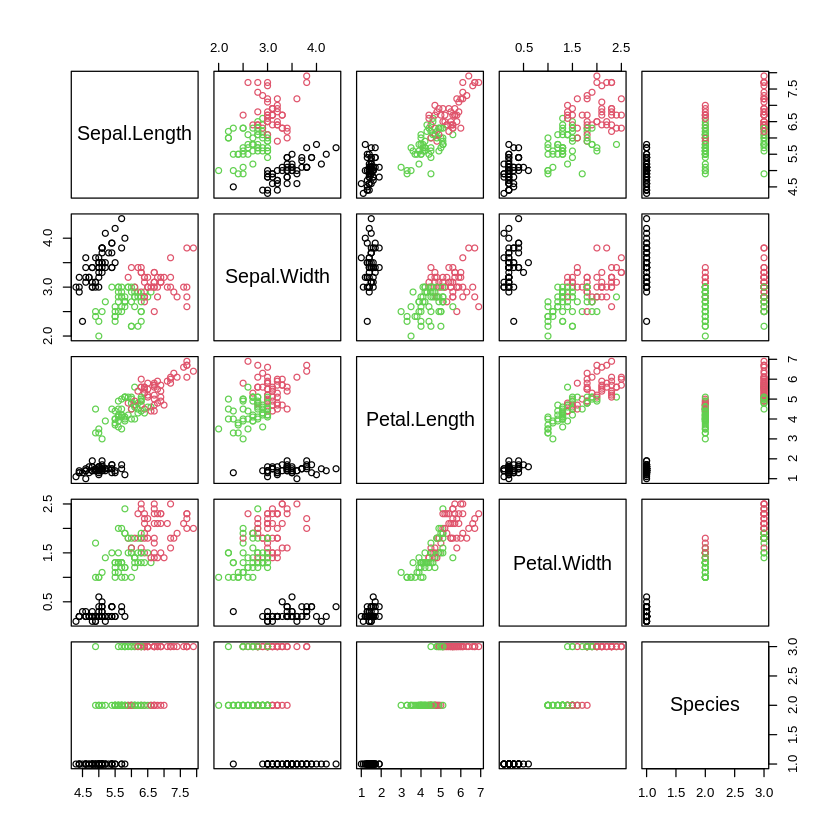

In [ ]:
plot(iris, col=output$cluster)

In [ ]:
table(iris$Species,output$cluster)
# clustering is pretty good for sentosa but average on the other species

            
              1  2  3
  setosa     50  0  0
  versicolor  0 11 39
  virginica   0 36 14

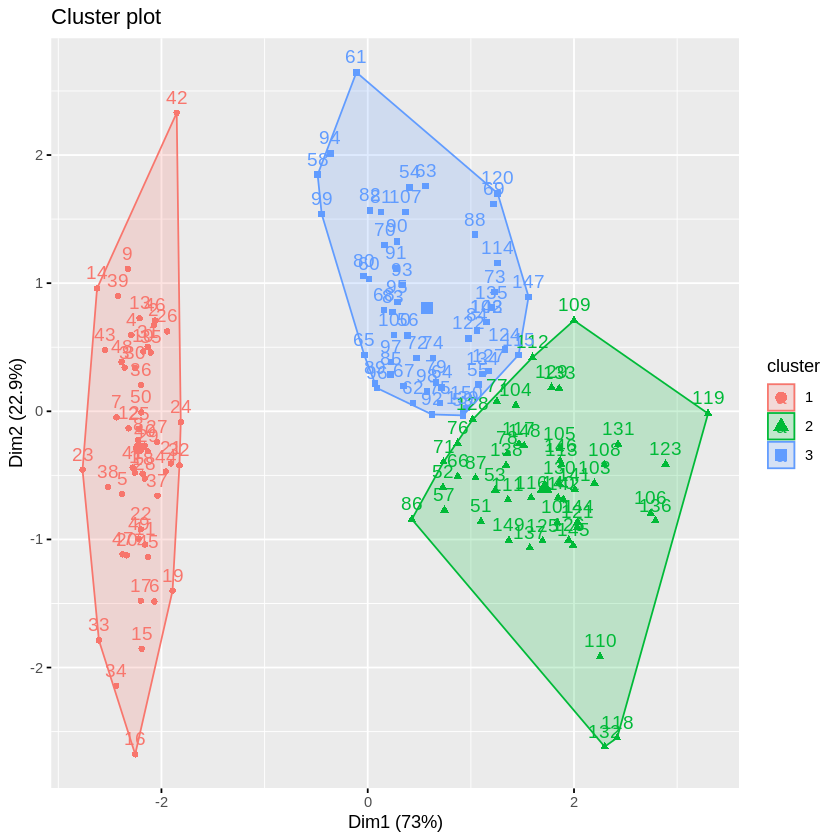

In [ ]:
# plot on 2D PCA reduced component
fviz_cluster(list(data=X,cluster=output$cluster))

# 4. References:
1. https://www.youtube.com/watch?v=NKQpVU1LTm8
2. https://www.youtube.com/watch?v=PX5nSBGB5Tw
